In [26]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

X = load_data()


Basic implementation of K-means consist of a procedure that first randomly sets the intiial centroids then starts a loop of 
1. repeatedly assigning training examples to their closest centroid, then 
2. recomputing the centroids based x\y mean.


In [27]:
def init_centroids(X, K):
    # Shuffle training examples
    randidx = np.random.permutation(X.shape[0])
    # Set first K examples as centroids
    centroids = X[randidx[:K]]
    return centroids

In [28]:
def find_closest_centroids(X, centroids):

    K = centroids.shape[0]
    m = X.shape[0]

    idx = np.zeros(m)
    distance = np.zeros((m, K))
    for i in range(m):
        for j in range(K):
            distance[i, j] = np.linalg.norm(X[i] - centroids[j])

    # Choose the index of the smallest distance that corresponds to a centroid
    idx = np.argmin(distance, axis=1)
    return idx

In [29]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    # get idices of the training examples corresponding to each centroid
    for j in range(K):
        indices = np.where(idx==j)
        centroid_indices = X[indices]
        # calculate means across columns = adjusted centroid
        centroids[j] = np.mean(centroid_indices, axis=0)

    return centroids

In [37]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        print(f"K-Means iteration {i}/{max_iters-1}")
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


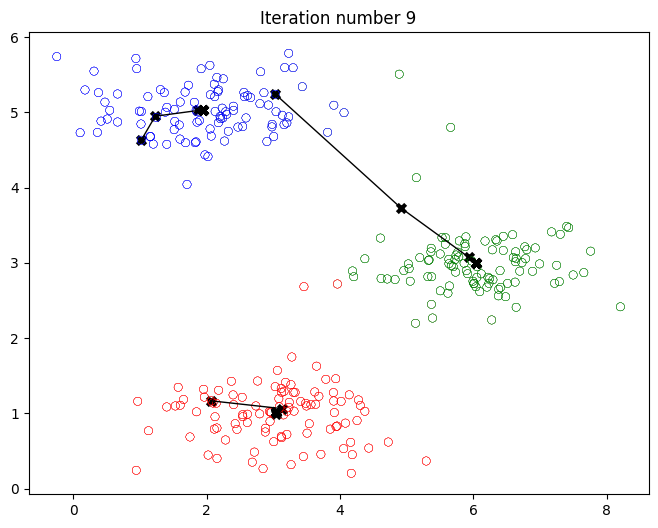

In [38]:

K=3
max_iters = 10
initial_centroids = init_centroids(X, K)
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

### Now to image compression

In 24-bit color representation of an image, each pixel consists of of 3 integerns (ranging from 0 to 255) that specify red, blue and green intensity values. 
The image that is used contains thousands of colors. The goal is to reduce the number of colors to 16. 

In the implementation each pixel is treated as a training example and the goal is to find 16 colors (clusters) that best group the pixels in the 3d rgb space.

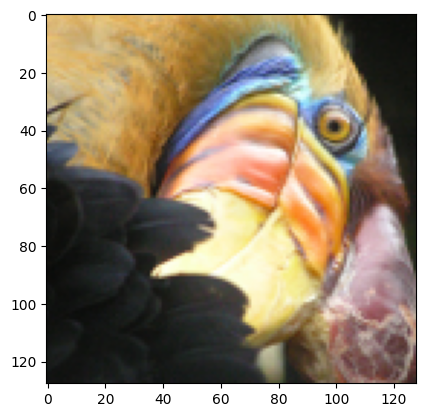

In [ ]:
original_img = plt.imread('bird_small.png')
plt.imshow(original_img)

In [34]:
print(f'The shape of original_img is', original_img.shape)

The shape of original_img is (128, 128, 3)


First two indeces are pixel positions and the third is RGB combination.


### Data prossesing:

In [35]:
# reshaping the original image into a 2d (m x 3) matrix and normalize each value by dividing it by 255 so they are all in 0-1 range. 
# each row will contain RGB values. A total of 128 x 128 = 16,384 training examples. 

X_img = np.reshape(original_img, (original_img.shape[0]*original_img.shape[1], 3))
print("X_img shape is:", X_img.shape)

X_img shape is: (16384, 3)


In [41]:
K = 16
max_iters = 10
initial_centroids = init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [42]:
idx[:5]

array([ 8, 11, 11, 11,  8], dtype=int64)

The code below will plot all colors in the original image. Red crosses represent clusters that will be used as new colors to compress the image

AttributeError: 'Axes3D' object has no attribute 'w_yaxis'

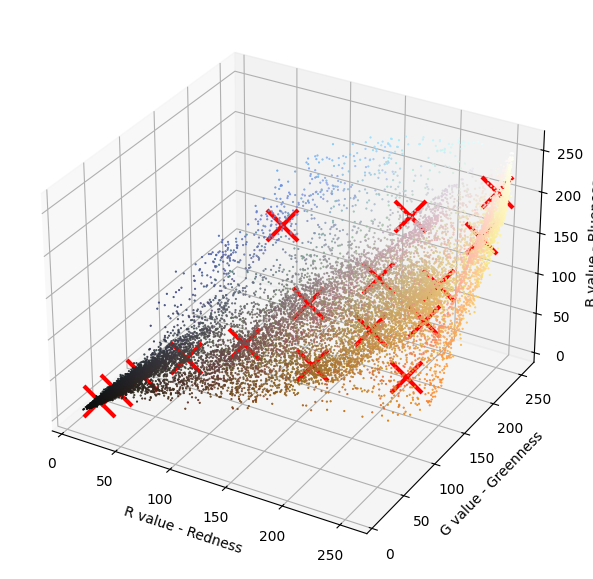

In [44]:
plot_kMeans_RGB(X_img, centroids, idx, K)

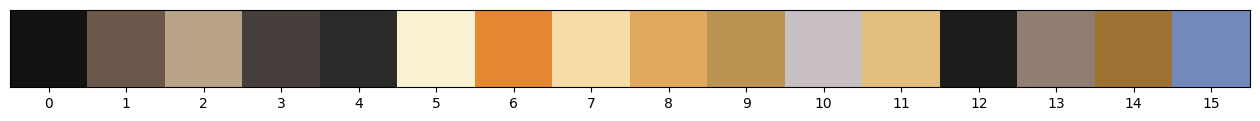

In [45]:
show_centroid_colors(centroids)

Now that we have a matrix of generalized colors (centroids), we can compress the image by replacing each pixel with the value of its closest centroid. 

In [51]:
# the closest centroid to each pixel
idx = find_closest_centroids(X_img, centroids)

# replace each pixel color with generalized one
X_compressed = centroids[idx, :]

# reshape back into proper dimensions
X_compressed = np.reshape(X_compressed, original_img.shape)

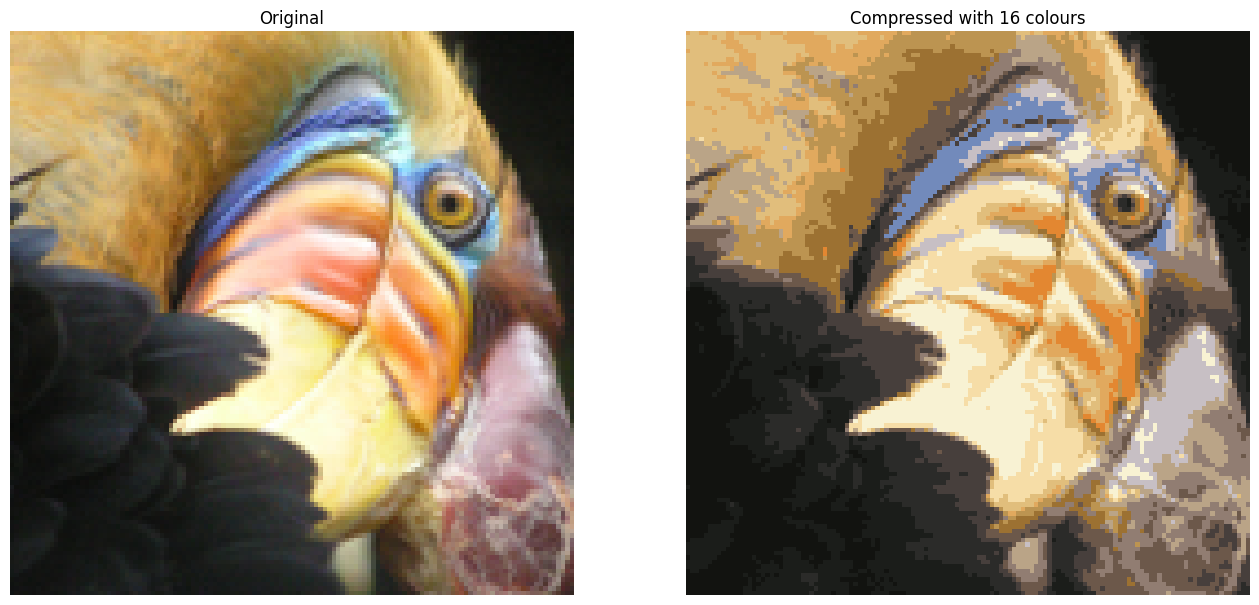

In [52]:
# original image
fix, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

# compressed one
ax[1].imshow(X_compressed)
ax[1].set_title(f'Compressed with {K} colours')
ax[1].set_axis_off()